In [ ]:
# 4. Time series prediction using RNN – stock market analysis or weather forecasting

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, SimpleRNN
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [18]:
df = pd.read_csv(r"C:\Users\User\Desktop\Datasets\TSLA.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date'], inplace=True)
data = df[['Close']].values

C:\Users\User\AppData\Local\Temp\ipykernel_5976\1559877954.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [23]:
def create_sequence(data, seq_len):
    x,y = [], []
    for i in range (len(data) - seq_len):
        x.append(data[i : i+seq_len])
        y.append(data[i+seq_len])
    return np.array(x), np.array(y)

seq_len = 60
x,y = create_sequence(scaled_data,seq_len)

In [24]:
split_idx = int(len(x) * 0.8)
x_train, x_test = x[:split_idx] , x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [28]:
model = Sequential([SimpleRNN(50, activation = 'relu',input_shape = (seq_len, 1)),
                   Dense(1)])
model.compile(optimizer='adam', loss ="mean_squared_error")

In [29]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 3.6256e-04 - val_loss: 0.0876
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8713e-06 - val_loss: 0.0867
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.7935e-06 - val_loss: 0.0858
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.7922e-06 - val_loss: 0.0866
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.8380e-06 - val_loss: 0.0887
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.6439e-06 - val_loss: 0.0894
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5734e-06 - val_loss: 0.0887
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8883e-06 - val_loss: 0.0887
Epoch 9/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.8591e-06 - val_loss: 0.0883
Epoch 10/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.5225e-06 - val_loss: 0.0882


In [30]:
input_seq = scaled_data[split_idx - seq_len : split_idx]
predictions = []

for _ in range(20):
    input_seq = np.reshape(input_seq, (1,seq_len,1))
    pred = model.predict(input_seq, verbose= 'auto')
    predictions.append(pred[0][0])
    input_seq = np.append(input_seq[:, 1: , :] ,[[pred[0]]], axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [31]:
pred_val = scaler.inverse_transform(np.array(predictions).reshape(-1,1))
actual_val = scaler.inverse_transform(np.array(scaled_data[split_idx : split_idx +20]))                                    

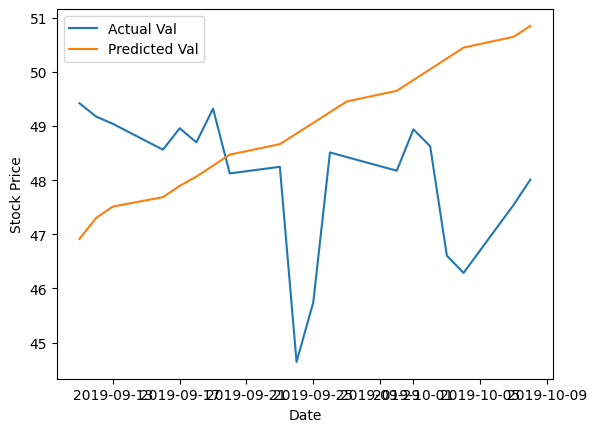

In [34]:
plt.plot(df.index[split_idx : split_idx +20], actual_val, label ="Actual Val")
plt.plot(df.index[split_idx : split_idx +20], pred_val, label ="Predicted Val")
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [38]:
for i in range(20):
    print(f"Day {i+1}: Actual: {actual_val[i][0]}, Predicted: {pred_val[i][0]}")


Day 1: Actual: 49.41999799999999, Predicted: 46.914527893066406
Day 2: Actual: 49.17400000000001, Predicted: 47.30209732055664
Day 3: Actual: 49.040001, Predicted: 47.51185989379883
Day 4: Actual: 48.562, Predicted: 47.68546676635742
Day 5: Actual: 48.958, Predicted: 47.8933219909668
Day 6: Actual: 48.698001999999995, Predicted: 48.065528869628906
Day 7: Actual: 49.32, Predicted: 48.266944885253906
Day 8: Actual: 48.124001, Predicted: 48.47111129760742
Day 9: Actual: 48.245998, Predicted: 48.66448974609375
Day 10: Actual: 44.641998, Predicted: 48.86022186279297
Day 11: Actual: 45.740002, Predicted: 49.05763244628906
Day 12: Actual: 48.512001, Predicted: 49.254638671875
Day 13: Actual: 48.425999, Predicted: 49.451995849609375
Day 14: Actual: 48.17399999999999, Predicted: 49.650630950927734
Day 15: Actual: 48.938, Predicted: 49.84932327270508
Day 16: Actual: 48.625999, Predicted: 50.04808807373047
Day 17: Actual: 46.605999, Predicted: 50.24752426147461
Day 18: Actual: 46.285999, Predicte